## Exploring Global Happiness 🌍😊

This project, undertaken by third-year **Computer Science** students at the University of Havana, focuses on a comprehensive **statistical analysis** of the **World Happiness Index** across 159 countries. The primary objective is to explore and understand the factors influencing happiness on a global scale. Through this study, we will employ a range of statistical techniques, including:

* **Descriptive statistics** to summarize the data
* **Inferential statistics** to draw conclusions about the population
* **Hypothesis testing** to validate our assumptions

Additionally, we will perform *value estimations* and analyze the relationships between various **socio-economic factors** and happiness scores. This project aims to provide valuable insights into the determinants of happiness and contribute to the broader understanding of global well-being. 🌍📊

> Javier Alejandro González Díaz C-312

> Kevin Márquez Vega C-312

> José Miguel Leyva de la Cruz C-312

### Importando librerías necesarias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

# Celda 1: Importar librerías
import matplotlib.pyplot as plt

# Configuración de gráficos
%matplotlib inline
sns.set(style="whitegrid")

/home/uhc121/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Cargando el DataSet sobre un Ranking de Felicidad Mundial tomado en 159 países diferentes

In [2]:
df = pd.read_csv('2019.csv')

### Exploración inicial del DataSet

In [3]:
df.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Continent                     156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [5]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

### Limpieza de datos
(Manejar valores nulos)

In [6]:
df = df.dropna()

### Análisis exploratorio de datos (EDA) 

> Distribución normal del Happinness Score

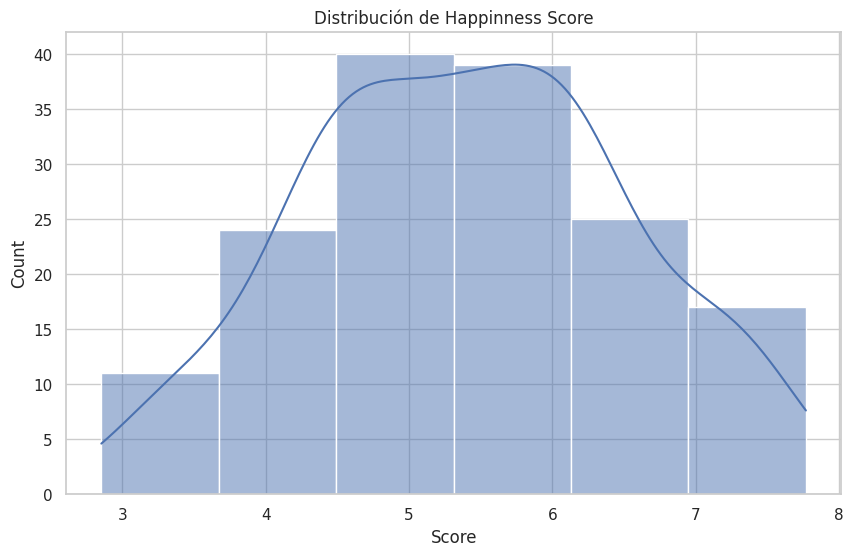

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True,binwidth=0.8)
plt.title('Distribución de Happinness Score')
plt.show()

### Gráfico de dispersión entre dos columnas

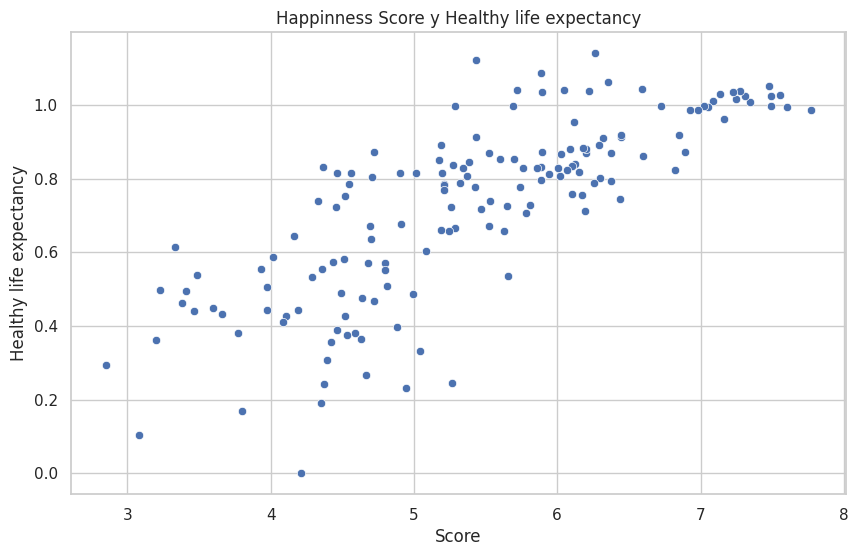

In [8]:
# Gráfico de dispersión entre dos columnas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Healthy life expectancy', data=df)
plt.title('Happinness Score y Healthy life expectancy')
plt.show()

### Análisis estadísticos específicos
Correlación entre variables

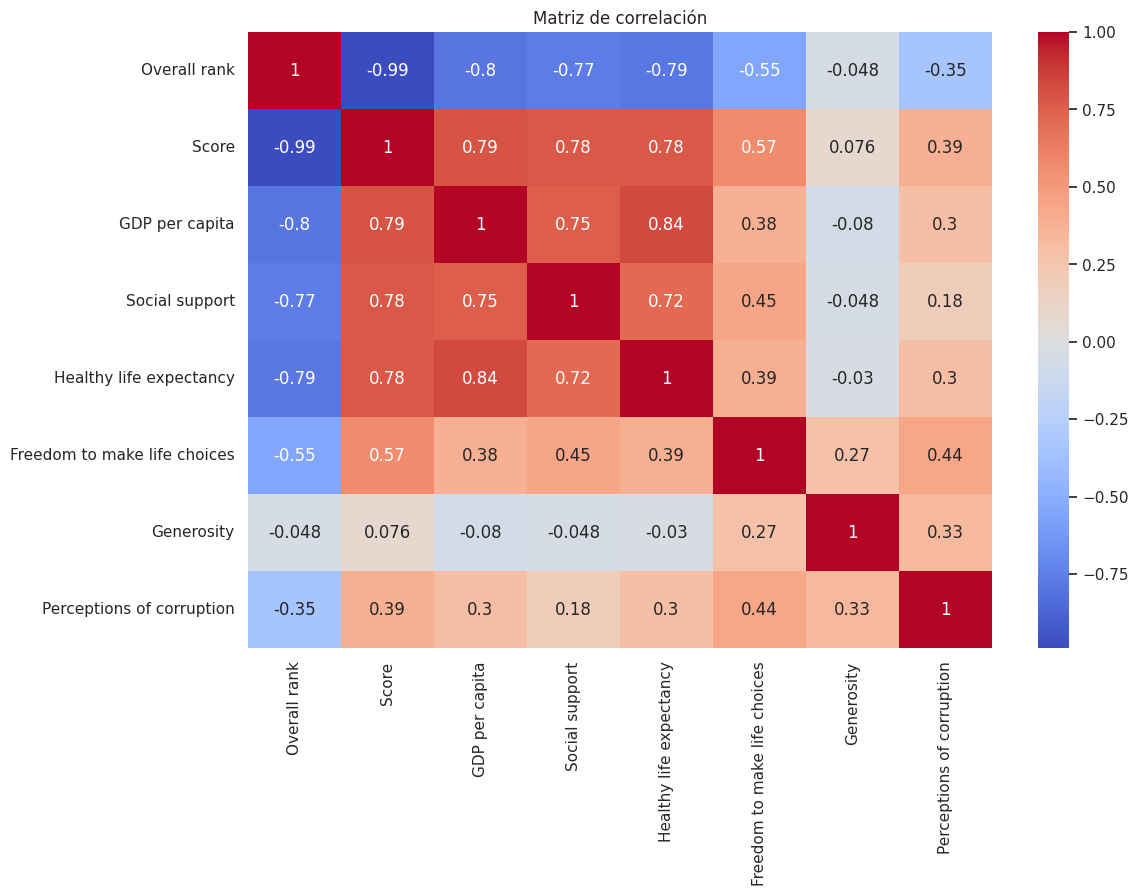

KeyError: 'grupo'

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Prueba de hipótesis (Ejemplo: prueba t de dos muestras)
grupo1 = df[df['grupo'] == 'A']['columna_interes']
grupo2 = df[df['grupo'] == 'B']['columna_interes']
t_stat, p_value = ttest_ind(grupo1, grupo2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

### Estimador de la media
Sabemos que nuestro parámetro de la media del valor "Score" distribuye de manera normal, por tanto podemos calcular el valor de la media utilizando la siguiente fórmula.
$$ \hat{x} = 1/n * \sum_{i = 1}^{n} x_i $$

In [57]:
mean = df['Score'].mean()
mean

5.407096153846155

### Agrupación de países por Continentes
La Felicidad evidentemente no se comporta igual por continentes. Según la encuesta analizada notemos como se tiene en cuenta el PIB de cada país, el cual puede ser drasticamente desigual entre países de continentes diferentes. Sería interesante lograr obtener información sobre el comportamiento de la felicidad según el continente al que pertenece cada país.

In [21]:
continents_groups = df.groupby('Continent')['Continent'].agg('count')
continents_groups

Continent
Africa           45
Asia             43
Europe           43
North America    13
Oceania           2
South America    10
Name: Continent, dtype: int64

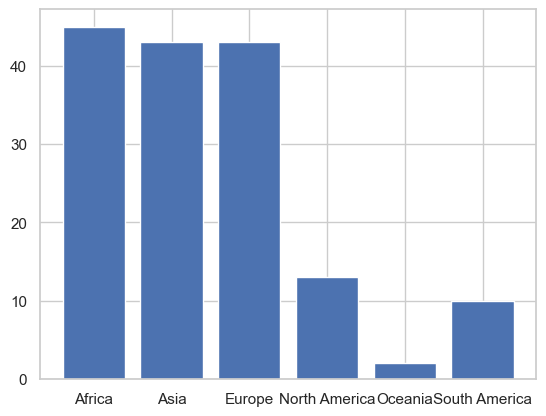

In [22]:
plt.bar(continents_groups.index, continents_groups.values)
plt.show()

### Estimaciones importantes
Como mencionamos anteriormente la felicidad puede comportarse diferente según el continente al que pertenece un país en específico, de manera general se puede afirmar que por continentes los índices de felicidad pueden sufirir una variación considerable. 

Si quisieramos estimar la varianza de la felicidad sobre un continente podremos aplicar la fórmula del estimador de la varianza:

$$ S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 $$

In [40]:
continent = 'Africa'
score_specific_continent = df[df['Continent'] == continent]['Score']
score_media = score_specific_continent.mean()
sums = 0
for value in score_specific_continent.values:
    sums += (value - score_media)**2

variance_square = (1/(score_specific_continent.count() - 1) * sums) 
variance_square

0.41433302828282836

Comprobemos utilizando intervalos de confianza que en efecto nuestra varianza obtenida es correcta
Para calcular el intervalo de confianza de la varianza, podemos usar la distribución chi-cuadrado. La fórmula para el intervalo de confianza de la varianza es:

$$ \sigma^2 \in \left( \frac{(n-1) * S^2}{\chi^{2}_{\alpha/2, n-1}}, \frac{(n-1) * S^2}{\chi^{2}_{1-\alpha/2, n-1}} \right) $$

Varianza muestral: 0.41433302828282836
Intervalo de confianza de la varianza: (0.2839600972790221, 0.661140175819729)


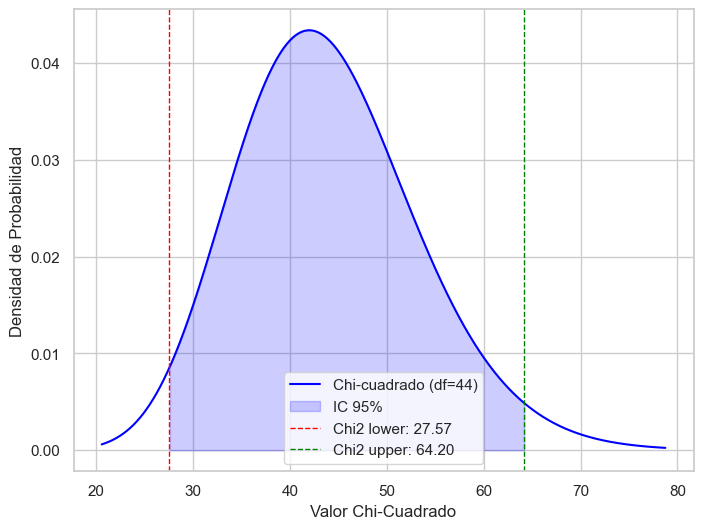

In [42]:
from scipy.stats import chi2
# Calcular la varianza muestral
n = score_specific_continent.count()  # Tamaño de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Valores críticos de la distribución chi-cuadrado
chi2_lower = chi2.ppf(alpha / 2, n - 1)
chi2_upper = chi2.ppf(1 - alpha / 2, n - 1)

# Intervalo de confianza de la varianza
ic_lower = (n - 1) * variance_square / chi2_upper
ic_upper = (n - 1) * variance_square / chi2_lower

print(f'Varianza muestral: {variance_square}')
print(f'Intervalo de confianza de la varianza: ({ic_lower}, {ic_upper})')

x = np.linspace(chi2.ppf(0.001, n - 1), chi2.ppf(0.999, n - 1), 1000)
y = chi2.pdf(x, n - 1)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, where=(x >= chi2_lower) & (x <= chi2_upper), color='blue', alpha=0.2, label='IC 95%')
plt.axvline(chi2_lower, color='red', linestyle='dashed', linewidth=1, label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', linewidth=1, label=f'Chi2 upper: {chi2_upper:.2f}')

plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()


### Indice Compuesto de Bienestar


In [53]:
media_por_continente = df.groupby('Continent')['Score'].transform('mean') 
df['Local Deviation'] = df['Score'] - media_por_continente
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Local Deviation
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,1.534140
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,1.365140
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,1.319140
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,1.259140
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,1.253140
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Europe,1.245140
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe,1.108140
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Oceania,0.039500
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America,1.123308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe,1.011140


Creemeos un gráfico de cajas y bigotes para representar este nuevo dato agregado a nuestra base de datos.

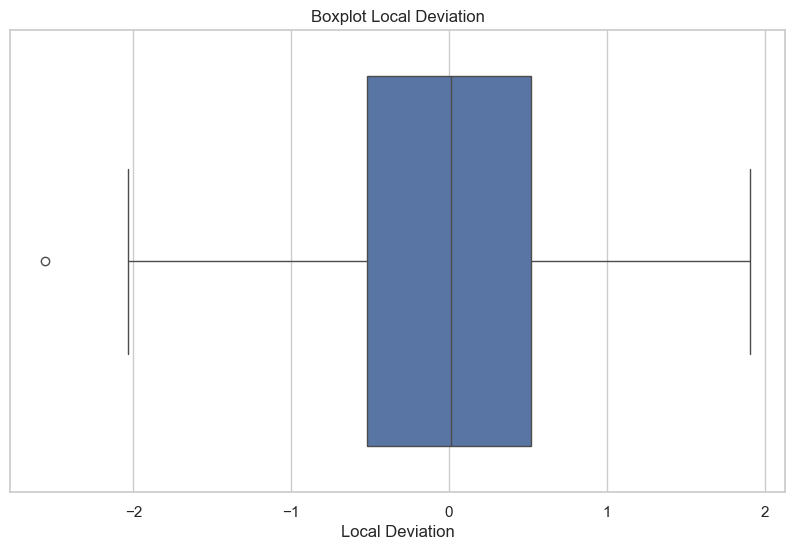

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Local Deviation', data=df)
plt.title('Boxplot Local Deviation')
plt.show()

### Análisis de los resultados
Notemos el comportamiento de nuestros datos según nuestro gráfico. Se puede concluir que, en efecto, el índice de felicidad de los países está estrechamente relacionado con el índice de felicidad de su continente. Además los países cuyo valor de desviación esté indicado por los "Bigotes", se puede afirmar que su índice de felicidad es considerablemente mayor o menor que el de su continente respectivamente. 

### Conclusiones

In [ ]:
print("Conclusiones y hallazgos del análisis")
# Celda 8: Guardar el dataset limpio
df.to_csv('ruta/a/tu/dataset_limpio.csv', index=False)

## Visualización adicional
### Boxplot de una columna

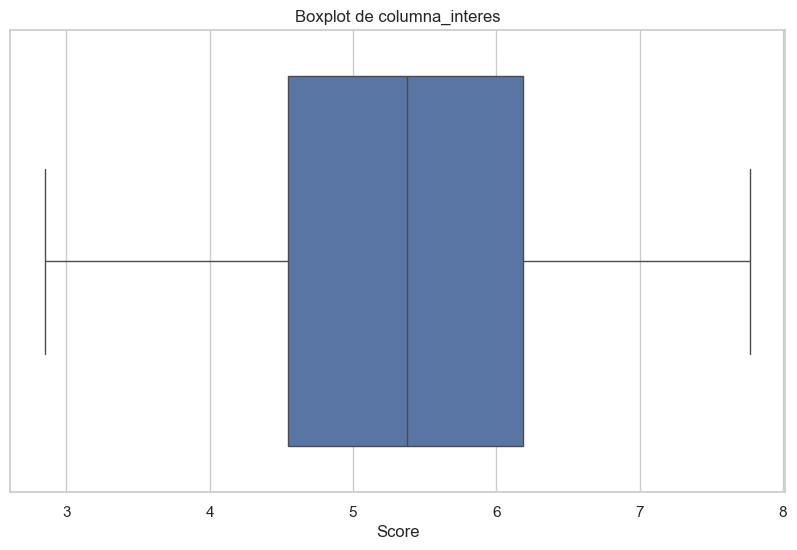

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', data=df)
plt.title('Boxplot de columna_interes')
plt.show()

### Análisis adicional
## Análisis de la media y la mediana de una columna

In [ ]:
mean_value = df['Score'].mean()
median_value = df['Score'].median()
print(f'Media de columna_interes: {mean_value}')
print(f'Mediana de columna_interes: {median_value}')

### Tests de Normalidad - Score


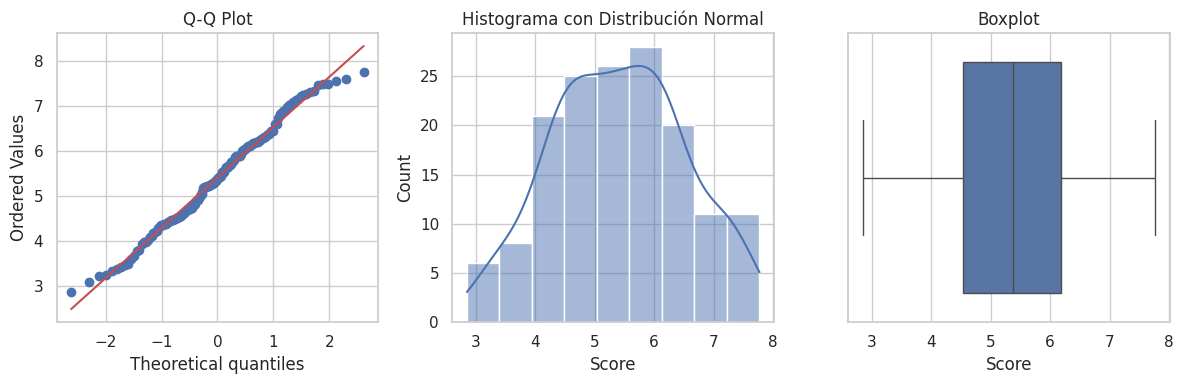

Test de Shapiro-Wilk:
Estadístico: 0.9872
P-valor: 0.1633

Test de Anderson-Darling:
Estadísticos críticos:
Nivel de significancia 15.0%: Valor crítico = 0.5620
Nivel de significancia 10.0%: Valor crítico = 0.6400
Nivel de significancia 5.0%: Valor crítico = 0.7680
Nivel de significancia 2.5%: Valor crítico = 0.8960
Nivel de significancia 1.0%: Valor crítico = 1.0660
Estadístico: 0.4231

--- Interpretación Shapiro-Wilk ---
Los datos parecen seguir una distribución normal según Shapiro-Wilk

--- Interpretación Anderson-Darling ---
Estadístico A: 0.4231

Valores críticos:
Nivel de significancia 15.0%:
  Valor crítico: 0.5620
  ✅ No se rechaza normalidad al 15.0%
Nivel de significancia 10.0%:
  Valor crítico: 0.6400
  ✅ No se rechaza normalidad al 10.0%
Nivel de significancia 5.0%:
  Valor crítico: 0.7680
  ✅ No se rechaza normalidad al 5.0%
Nivel de significancia 2.5%:
  Valor crítico: 0.8960
  ✅ No se rechaza normalidad al 2.5%
Nivel de significancia 1.0%:
  Valor crítico: 1.0660
  ✅ No

In [46]:
df = pd.read_csv('2019.csv')
# Cargar los datos
scores = df['Score']

# 1. Test de Shapiro-Wilk (el más potente para muestras pequeñas)
shapiro_test = stats.shapiro(scores)

# 2. Test de Anderson-Darling
anderson_test = stats.anderson(scores, dist='norm')

# Visualizaciones para evaluar normalidad

# 4. Q-Q Plot (Gráfico Cuantil-Cuantil)
plt.figure(figsize=(12, 4))

plt.subplot(131)
stats.probplot(scores, plot=plt)
plt.title('Q-Q Plot')

# 5. Histograma con curva normal
plt.subplot(132)
sns.histplot(scores, kde=True)
plt.title('Histograma con Distribución Normal')

# 6. Boxplot
plt.subplot(133)
sns.boxplot(x=scores)
plt.title('Boxplot')

plt.tight_layout()
plt.show()

# Imprimir resultados de los tests
print("Test de Shapiro-Wilk:")
print(f"Estadístico: {shapiro_test.statistic:.4f}")
print(f"P-valor: {shapiro_test.pvalue:.4f}")

print("\nTest de Anderson-Darling:")
print("Estadísticos críticos:")
for i in range(len(anderson_test.critical_values)):
    sig_level = anderson_test.significance_level[i]
    crit_val = anderson_test.critical_values[i]
    print(f"Nivel de significancia {sig_level}%: Valor crítico = {crit_val:.4f}")
print(f"Estadístico: {anderson_test.statistic:.4f}")

# Interpretación

# Shapiro-Wilk
print("\n--- Interpretación Shapiro-Wilk ---")
if shapiro_test.pvalue > alpha:
    print("Los datos parecen seguir una distribución normal según Shapiro-Wilk")
else:
    print("Los datos NO parecen seguir una distribución normal según Shapiro-Wilk")

# Anderson-Darling
print("\n--- Interpretación Anderson-Darling ---")
print(f"Estadístico A: {anderson_test.statistic:.4f}")

# Comparar con valores críticos
print("\nValores críticos:")
for i in range(len(anderson_test.critical_values)):
    sig_level = anderson_test.significance_level[i]
    crit_val = anderson_test.critical_values[i]
    
    print(f"Nivel de significancia {sig_level}%:")
    print(f"  Valor crítico: {crit_val:.4f}")
    
    if anderson_test.statistic < crit_val:
        print(f"  ✅ No se rechaza normalidad al {sig_level}%")
    else:
        print(f"  ❌ Se rechaza normalidad al {sig_level}%")


## Conclusiones
### Criterios de Evaluación:

### Shapiro-Wilk:
. Estadístico W cercano a 1 ✅  
. P-valor > 0.05 ✅  
. Interpretación: No hay evidencia para rechazar normalidad  

### Anderson-Darling:
. Estadístico A menor que valores críticos ✅  
. Interpretación: Consistente con distribución normal

### 3. Análisis Descriptivo:
. Media ≈ Mediana (simetría) ✅  
. Asimetría cercana a 0 ✅  
. Curtosis cercana a 0 ✅  

### Visualizaciones de Soporte:
### Q-Q Plot:  
. Puntos próximos a línea diagonal    
. Sin desviaciones sistemáticas    

### Histograma:  
. Forma de campana  
. Simétrico alrededor de la media  

### Boxplot:  
. Sin outliers extremos  
. Distribución simétrica  

## Conclusión Técnica
. ✅ Evidencia Estadística de Normalidad:    
. Pruebas formales no rechazan distribución normal  
. Estadísticos descriptivos coherentes  
. Visualizaciones consistentes con normalidad  

### Intervalos de confianza para estimar la media del Score


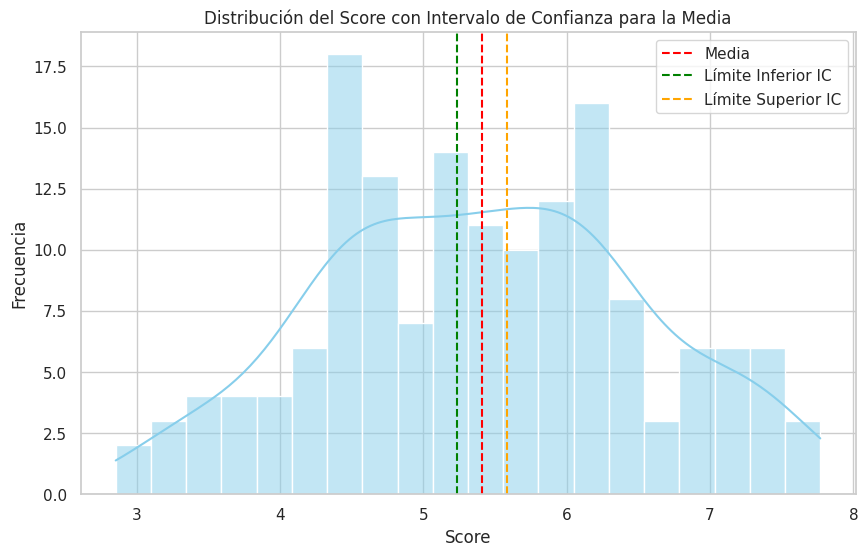

In [47]:
from scipy import stats
mean_score = df['Score'].mean()
variance_score = df['Score'].var()
n = df['Score'].count()  # Tamaño de la muestra
alpha = 0.05  # Nivel de significancia (95% de confianza)

# Intervalo de confianza para la media
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)  # Valor crítico t
margin_of_error = t_critical * (np.sqrt(variance_score) / np.sqrt(n))
ci_mean = (mean_score - margin_of_error, mean_score + margin_of_error)


# Grafico
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, color='skyblue', bins=20)
plt.axvline(mean_score, color='red', linestyle='--', label='Media')
plt.axvline(ci_mean[0], color='green', linestyle='--', label='Límite Inferior IC')
plt.axvline(ci_mean[1], color='orange', linestyle='--', label='Límite Superior IC')
plt.title('Distribución del Score con Intervalo de Confianza para la Media')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Intervalo de confianza para estimar la varianza del Score


Varianza muestral: 1.239035842307692
Intervalo de confianza para la varianza (95%): (1.003596601127352, 1.5687485380763575)


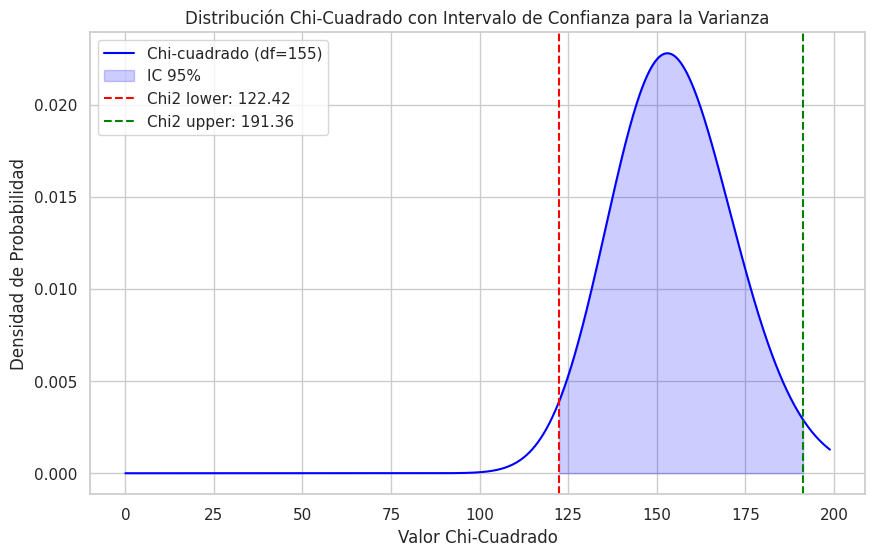

In [48]:
chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
ci_variance = ((n - 1) * variance_score / chi2_upper, 
               (n - 1) * variance_score / chi2_lower)

print(f"Varianza muestral: {variance_score}")
print(f"Intervalo de confianza para la varianza (95%): {ci_variance}")

# Gráfico de la distribución chi-cuadrado
plt.figure(figsize=(10, 6))
x = np.linspace(0, stats.chi2.ppf(0.99, df=n-1), 1000)
y = stats.chi2.pdf(x, df=n-1)

plt.plot(x, y, label=f'Chi-cuadrado (df={n-1})', color='blue')
plt.fill_between(x, y, 
                 where=(x >= chi2_lower) & (x <= chi2_upper), 
                 color='blue', 
                 alpha=0.2, 
                 label='IC 95%')

plt.axvline(chi2_lower, color='red', linestyle='dashed', 
            label=f'Chi2 lower: {chi2_lower:.2f}')
plt.axvline(chi2_upper, color='green', linestyle='dashed', 
            label=f'Chi2 upper: {chi2_upper:.2f}')

plt.title('Distribución Chi-Cuadrado con Intervalo de Confianza para la Varianza')
plt.xlabel('Valor Chi-Cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

### Prueba de Hipotesis - Media

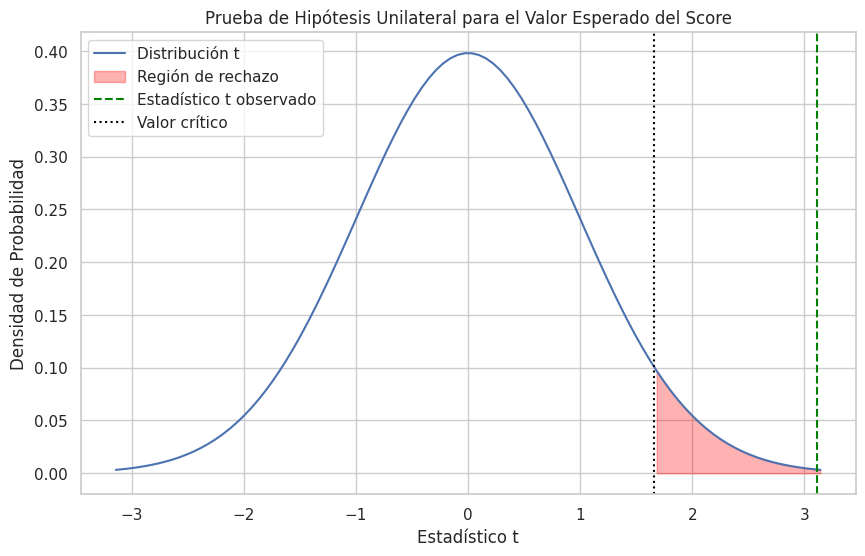

Prueba de Hipótesis Unilateral para el Valor Esperado del Score
Hipótesis nula (H0): μ ≤ 5.13
Hipótesis alternativa (H1): μ > 5.13

Estadístico t: 3.1092
Valor crítico: 1.6547
P-valor: 0.0011
Media muestral: 5.4071
Desviación estándar muestral: 1.1131

Conclusion: Rechazar H0
Hay evidencia estadística significativa para afirmar que el valor esperado del Score es mayor que 5.13


In [49]:
df = pd.read_csv('2019.csv')
# Datos del dataset
scores = df['Score']

# Parámetros de la prueba de hipótesis
# H0: μ ≤ 5.5 (valor nulo)
# H1: μ > 5.5 (prueba unilateral derecha)

# Estadísticos de la muestra
sample_mean = scores.mean()
sample_std = scores.std()
n = len(scores)

# Valor nulo de la hipótesis
mu_0 = 5.13

# Calcular el estadístico t
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Grados de libertad
df = n - 1

# Calcular el p-valor (prueba unilateral derecha)
p_value = 1 - stats.t.cdf(t_statistic, df)

# Nivel de significancia
alpha = 0.05

# Visualización de la prueba de hipótesis
plt.figure(figsize=(10, 6))
x = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)
y = stats.t.pdf(x, df)

plt.plot(x, y, label='Distribución t')
plt.title('Prueba de Hipótesis Unilateral para el Valor Esperado del Score')
plt.xlabel('Estadístico t')
plt.ylabel('Densidad de Probabilidad')

# Región de rechazo (unilateral derecha)
t_critico = stats.t.ppf(1 - alpha, df)

plt.fill_between(x, y, where=(x >= t_critico), color='red', alpha=0.3, label='Región de rechazo')

# Estadístico observado
plt.axvline(t_statistic, color='green', linestyle='--', label='Estadístico t observado')
plt.axvline(t_critico, color='black', linestyle=':', label='Valor crítico')

plt.legend()
plt.grid(True)
plt.show()

# Imprimir resultados
print("Prueba de Hipótesis Unilateral para el Valor Esperado del Score")
print(f"Hipótesis nula (H0): μ ≤ {mu_0}")
print(f"Hipótesis alternativa (H1): μ > {mu_0}")
print(f"\nEstadístico t: {t_statistic:.4f}")
print(f"Valor crítico: {t_critico:.4f}")
print(f"P-valor: {p_value:.4f}")
print(f"Media muestral: {sample_mean:.4f}")
print(f"Desviación estándar muestral: {sample_std:.4f}")

# Conclusión
if p_value < alpha:
    print("\nConclusion: Rechazar H0")
    print(f"Hay evidencia estadística significativa para afirmar que el valor esperado del Score es mayor que {mu_0}")
else:
    print("\nConclusion: No rechazar H0")
    print(f"No hay evidencia estadística suficiente para afirmar que el valor esperado del Score sea mayor que {mu_0}")